In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

**Paso 1: Postulacion de Problema y Recoleccion de Datos**

In [2]:
#carga de datos a dataframe
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Paso 2: Exploracion y Limipeza de Datos**

In [3]:
#dimensiones
n_rows = df.shape[0]
n_columns = df.shape[1]
print(f'La tabla contiene {n_rows} filas y {n_columns} columnas')

La tabla contiene 1338 filas y 7 columnas


In [4]:
# Columnas, tipos de dato y valores nulos
i = 1

for col in df.columns:
    print(f'{i}- {col}: {df[col].dtype}, {df[col].isna().sum()} nulos')
    i += 1

1- age: int64, 0 nulos
2- sex: object, 0 nulos
3- bmi: float64, 0 nulos
4- children: int64, 0 nulos
5- smoker: object, 0 nulos
6- region: object, 0 nulos
7- charges: float64, 0 nulos


**2.1 Eliminar Duplicados**

In [5]:
# detect duplicates (?)
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


- Eliminacion de duplicados no se aplica en este caso ya que puede haber sido coincidencia en los registros, y no existe identificador unico para confirmar que se trate efectivamente de un duplicado.

**2.2 Eliminar Informacion Irrelevante**

- No aplica

**Paso 3: Analisis de Variables Univariadas**

**3.1 Analisis de Variables Categoricas**

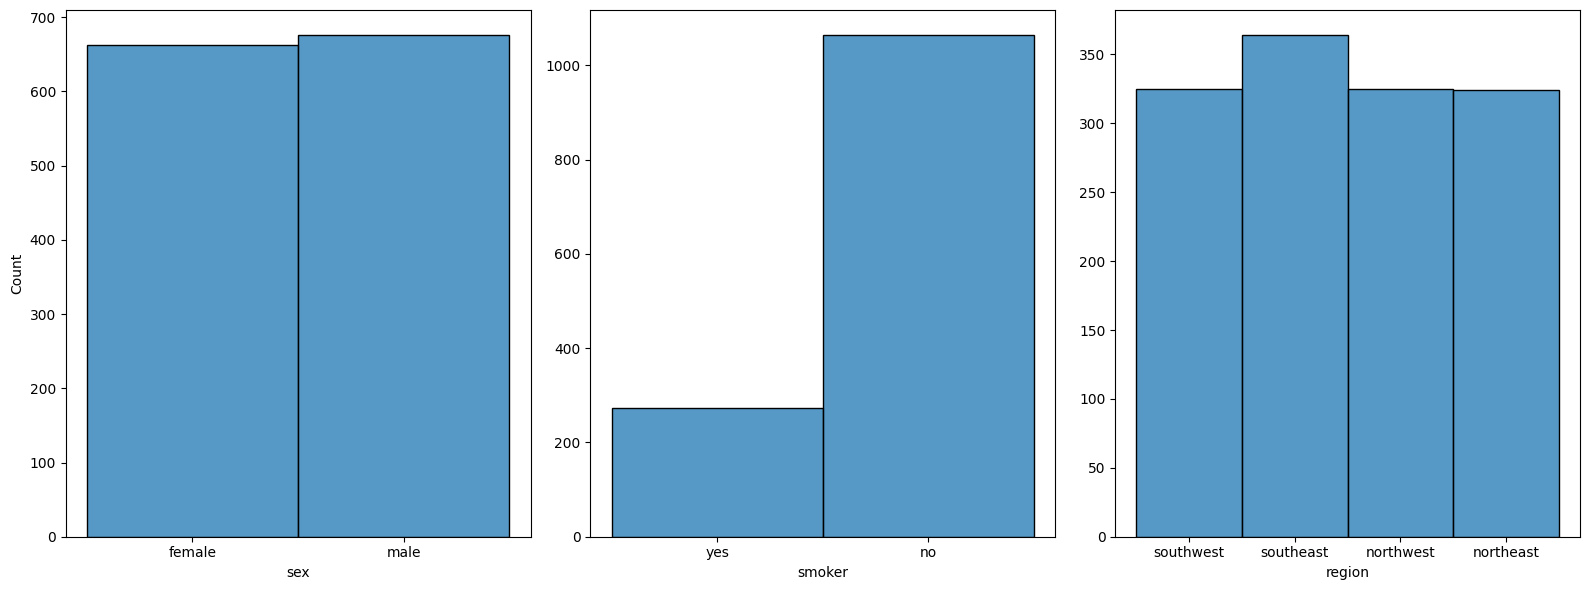

In [6]:
#crear grilla para graficos
fig, axis = plt.subplots(1, 3, figsize = (16, 6))

#crear multiples histogramas
sns.histplot(ax = axis[0], data = df, x = "sex")
sns.histplot(ax = axis[1], data = df, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = df, x = "region").set(ylabel = None)

# ajustar y mostrar graficos
plt.tight_layout()
plt.show()

- Distribucion de genero es practicamente equitativa
- Existe una proporcion aproximada de fumadores a no fumadores de 1:5
- La distribucion entre regiones es muy similar, excepto en el sudeste donde parece haber 20 a 30 registros mas

**3.2 Analisis de Variables Numericas**

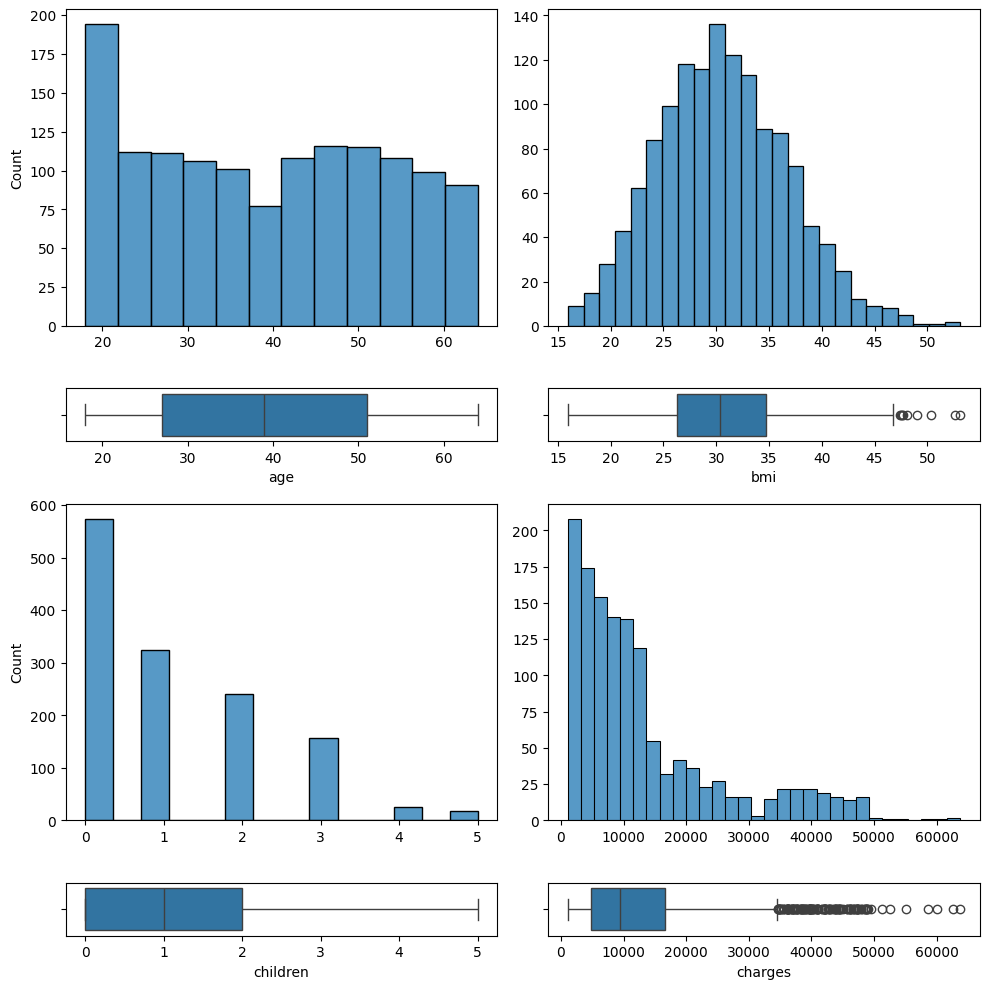

In [7]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")
sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- Los rangos de edades rodean en general los 100 registros en cada uno, con las excepciones del rango en torno a 20 años (casi 200 registros) y el rango en torno a 40 años (alrededor de 75 registros). Consecuemente, la mediana de la distribucion de edades se ve levemente desplazada hacia la izquierda respecto del centro del rango global de edades.
- La distribucion de registros de IMC es practicamente normal, con algunos datos atipicos hacia la derecha y una media y mediana en torno al valor 30.
- La distribucion de la cantidad de niños se ve claramente desplazada hacia la izquierda, con la mitad de los registros con valores de 0 y 1.
- La mitad de los seguros de menor valor se encuentra entre 1,000 y 10,000. La mitad superior es mas dispersa, con valores concentrados entre los 10,000 y los 35,000 y datos atipicos hasta los 65,000.

**Paso 4: Analisis de Variables Multivariadas**

**4.1 Analisis Numerico-Numerico**

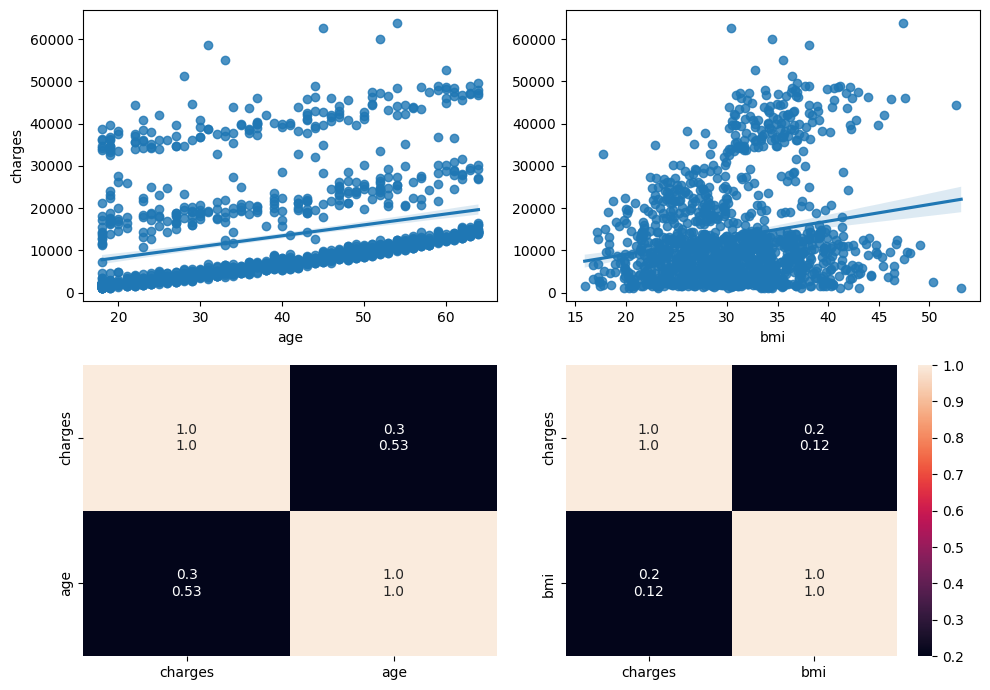

In [8]:
#crear grilla para graficos
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

#calcular matrices de correlacion
charges_age_pcorr = df[["charges", "age"]].corr(method="pearson").round(2)
charges_age_scorr = df[["charges", "age"]].corr(method="spearman").round(2)
charges_age_annotations = charges_age_pcorr.astype(str) + "\n" + charges_age_scorr.astype(str)

charges_bmi_pcorr = df[["charges", "bmi"]].corr(method="pearson").round(2)
charges_bmi_scorr = df[["charges", "bmi"]].corr(method="spearman").round(2)
charges_bmi_annotations = charges_bmi_pcorr.astype(str) + "\n" + charges_bmi_scorr.astype(str)

#crear diagramas de dispersion
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(charges_age_pcorr, annot = charges_age_annotations, fmt = "", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(charges_bmi_pcorr, annot = charges_bmi_annotations, fmt = "", ax = axis[1, 1])

# ajuster y mostrar grafico
plt.tight_layout()
plt.show()

- Cargos y edad muestran una correlacion en general moderada. La distribucion de los puntos en el grafico pareciera indicar a priori tres grupos con diferentes logicas de precio, al menos desde el intercepto con el eje y.
- Cargos e IMC muestran una debil correlacion en general.

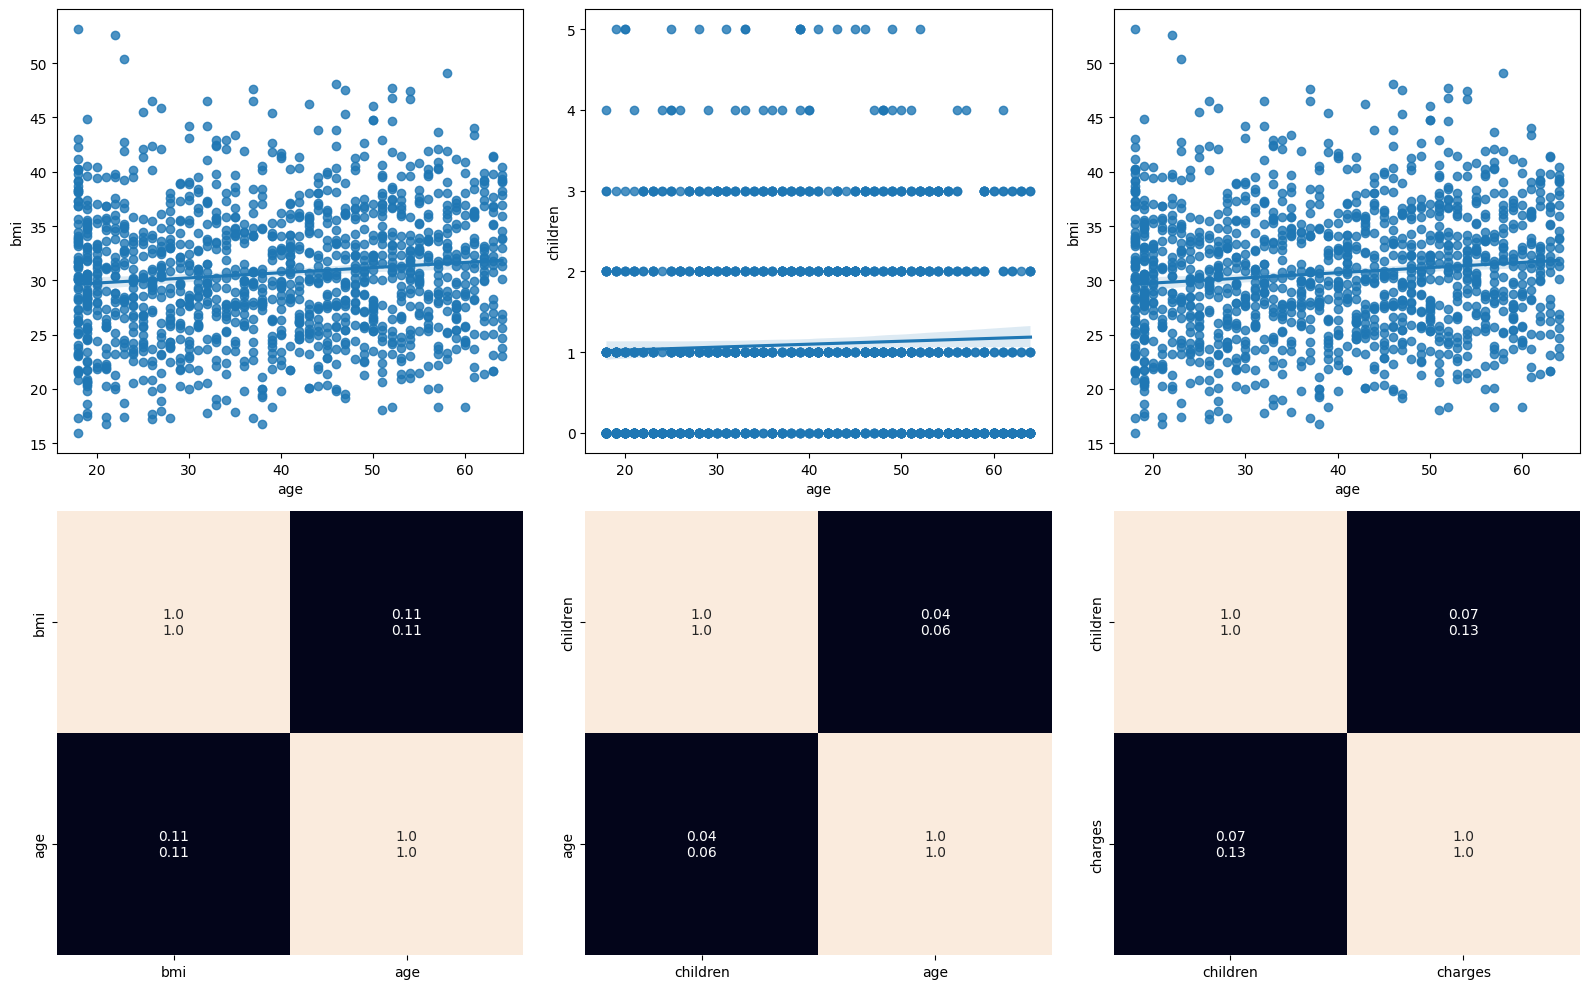

In [9]:
#crear grilla para graficos
fig, axis = plt.subplots(2, 3, figsize = (16, 10))

#calcular matrices de correlacion
bmi_age_pcorr = df[["bmi", "age"]].corr(method="pearson").round(2)
bmi_age_scorr = df[["bmi", "age"]].corr(method="spearman").round(2)
bmi_age_annotations = bmi_age_pcorr.astype(str) + "\n" + bmi_age_scorr.astype(str)

children_age_pcorr = df[["children", "age"]].corr(method="pearson").round(2)
children_age_scorr = df[["children", "age"]].corr(method="spearman").round(2)
children_age_annotations = children_age_pcorr.astype(str) + "\n" + children_age_scorr.astype(str)

children_charges_pcorr = df[["children", "charges"]].corr(method="pearson").round(2)
children_charges_scorr = df[["children", "charges"]].corr(method="spearman").round(2)
children_charges_annotations = children_charges_pcorr.astype(str) + "\n" + children_charges_scorr.astype(str)

#crear multiples diagramas de dispersion
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "bmi")
sns.heatmap(bmi_age_pcorr, annot = bmi_age_annotations, fmt = "", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "children")
sns.heatmap(children_age_pcorr, annot = children_age_annotations, fmt = "", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "age", y = "bmi")
sns.heatmap(children_charges_pcorr, annot = children_charges_annotations, fmt = "", ax = axis[1, 2], cbar = False)

#ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Los valores de IMC muestran una debil correlacion con la edad, con valores altos y bajos del indice distribuidos de forma aparentemente equitativa a lo largo de las edades de los individuos
- El resto de las variables no muestra signos de correlacion considerables

**4.2 Analisis Categorico-Categorico**

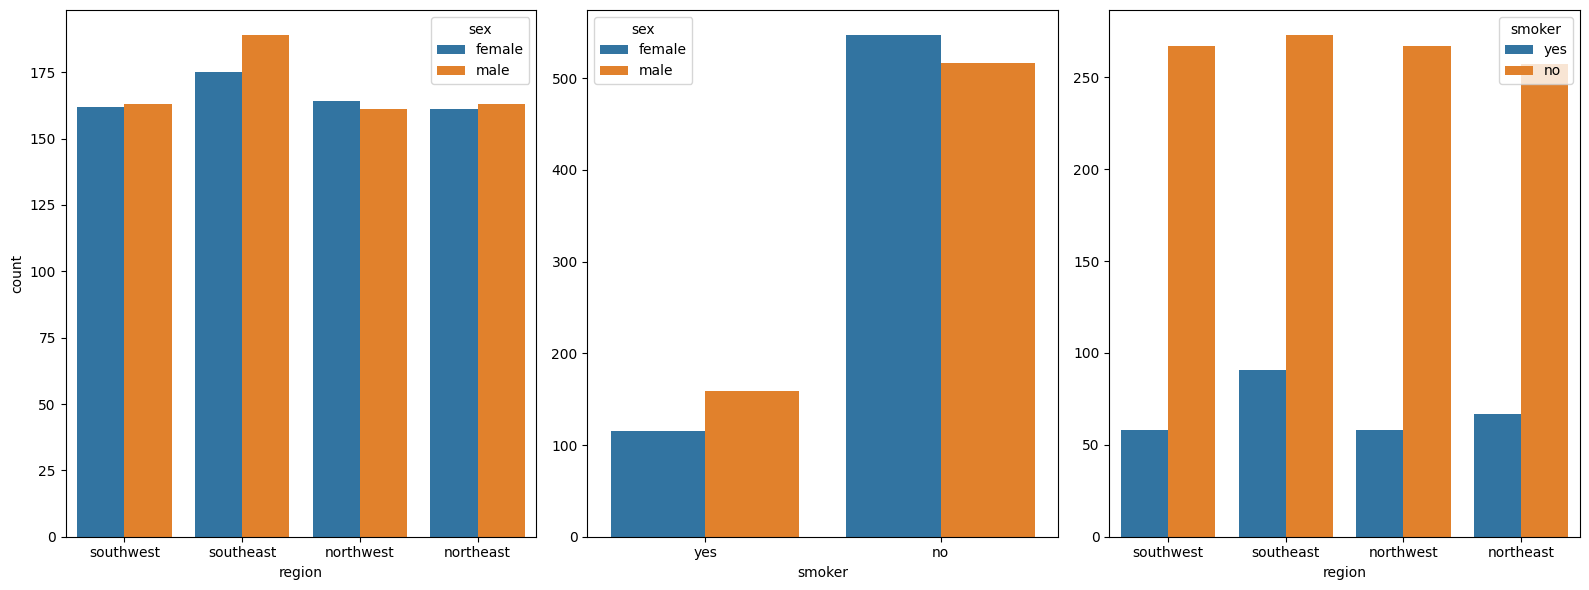

In [10]:
#crear grilla para graficos
fig, axis = plt.subplots(1, 3, figsize = (16, 6))

#calcular matrices de correlacion
sns.countplot(ax = axis[0], data = df, x = "region", hue = "sex")
sns.countplot(ax = axis[1], data = df, x = "smoker", hue = "sex").set(ylabel = None)
sns.countplot(ax = axis[2], data = df, x = "region", hue = "smoker").set(ylabel = None)

# ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- La muestra por region mantiene proporciones similares en terminos de genero y fumadores/no fumadores
- Parece haber una mayor proporcion de hombres fumadores. Las diferencias relativas son menores en terminos de genero para no fumadores

**4.3 Combinacion de **

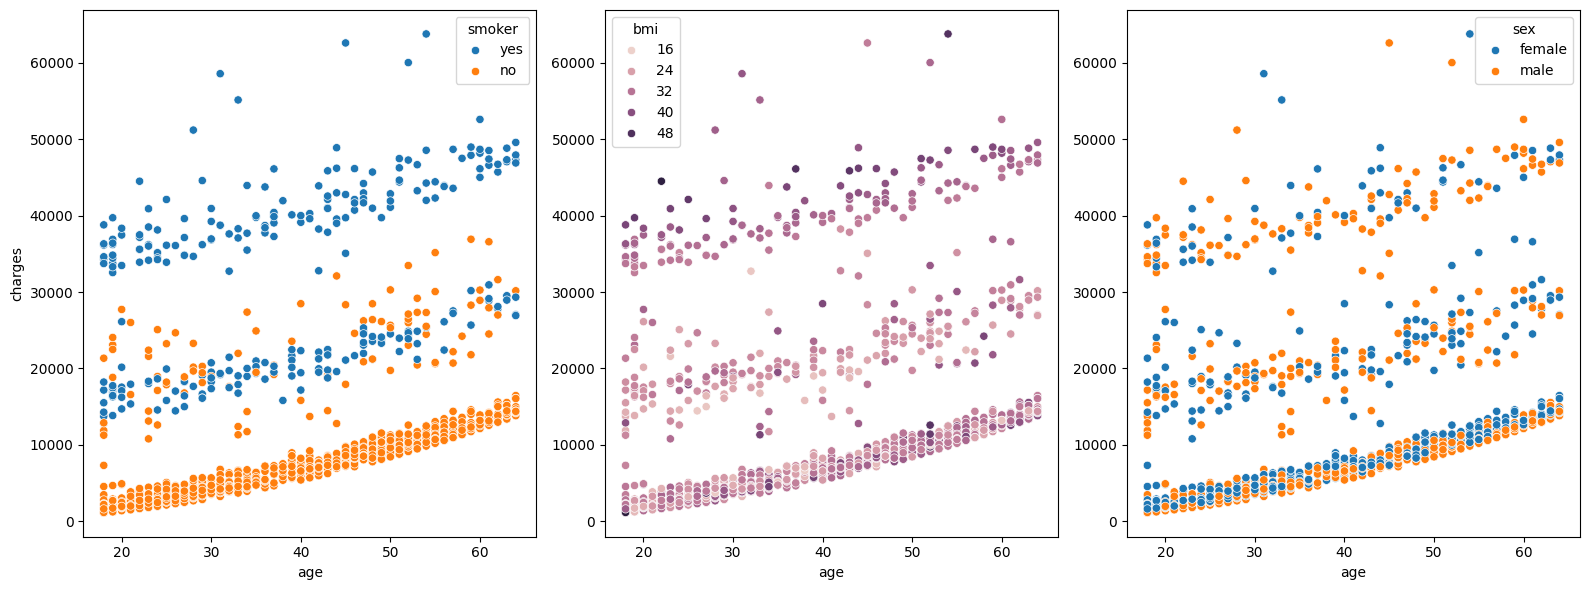

In [11]:
#crear grilla para graficos
fig, axis = plt.subplots(1, 3, figsize = (16, 6))

#crear diagrama de dispersion
sns.scatterplot(ax = axis[0], data = df, x = "age", y = "charges", hue='smoker')
sns.scatterplot(ax = axis[1], data = df, x = "age", y = "charges", hue ='bmi').set(ylabel = None)
sns.scatterplot(ax = axis[2], data = df, x = "age", y = "charges", hue ='sex').set(ylabel = None)

plt.tight_layout()

plt.show()

- Ser fumador/no fumador muestra una clara general en cuanto a los cargos del seguro medico, con individuos fumadores ubicandose en la parte mas alta de los cobros.
- Valores altos de IMC parecieran tambien tender a ubicarse en la parte alta de la distribucion de los cargos.
- El genero no pareciera tener mayor influencia en los niveles de los cobros.

**4.4 Analisis de Correlacion**

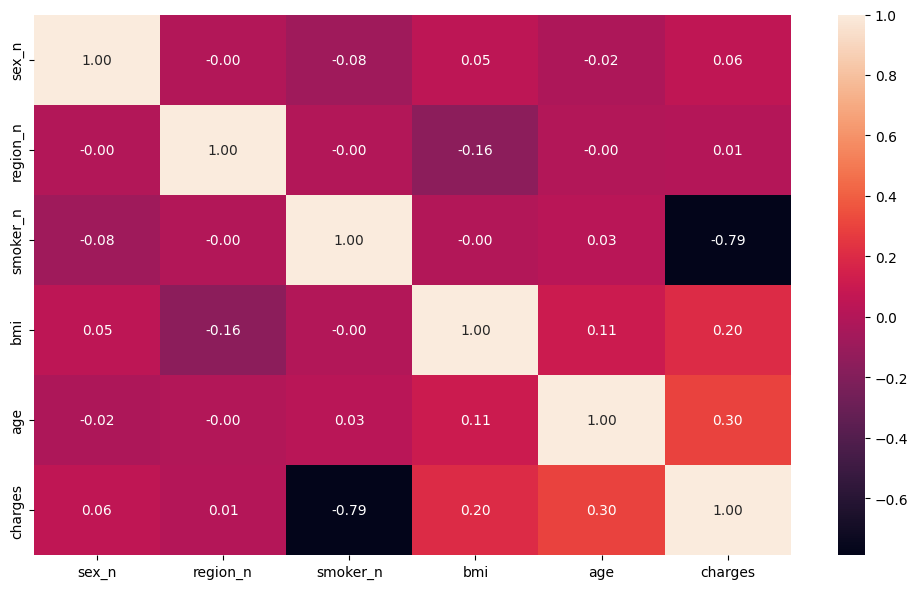

In [12]:
#crear nuevo df para correlacion
df_corr = df.copy()

#convertir variables categoricas a numericas
df_corr["sex_n"] = pd.factorize(df["sex"])[0]
df_corr["region_n"] = pd.factorize(df["region"])[0]
df_corr["smoker_n"] = pd.factorize(df["smoker"])[0]

#crear grilla para grafico
fig, axis = plt.subplots(figsize = (10, 6))

#crear mapa de calor con correlaciones
sns.heatmap(df_corr[["sex_n", "region_n", "smoker_n", "bmi", "age", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- Las 3 variables de mayor influencia sobre los cargos, en orden decreciente de magnitud de influencia son:
    - Fumador/no fumador (negativa, fuerte)
    - Edad (positiva, moderada)
    - Bmi (positiva, moderada/debil) 

**4.3 Analisis Numerico-Categorico**

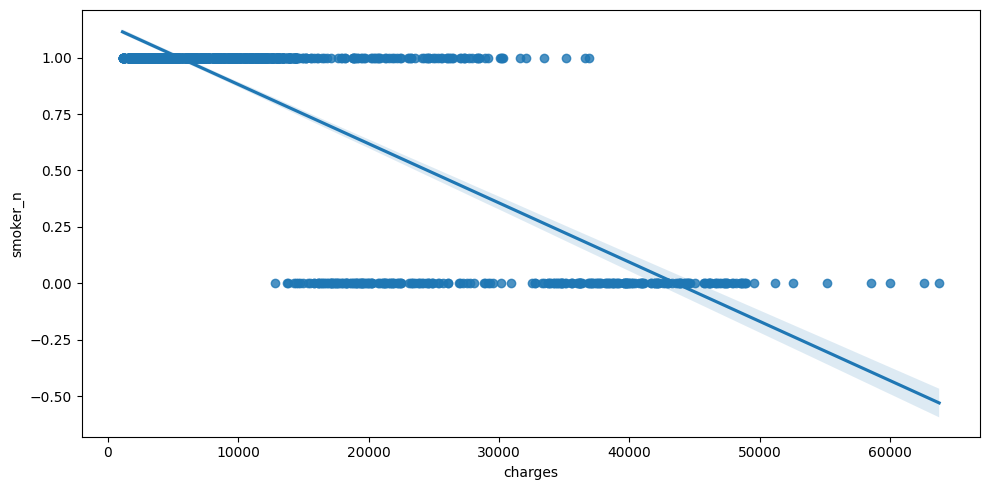

In [13]:
#crear grilla para grafico
fig, axis = plt.subplots(figsize = (10, 5))

#crear plot de regresion para cargos segun fumador/no fumador
sns.regplot(data = df_corr, x = "charges", y = "smoker_n")

#ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Se nota una clara diferencia en los rangos de los cargos para fumadores y no fumadores

**Paso 5: Ingenieria de Caracteristicas**

**5.1 Analisis de Valores Atipicos**

In [14]:
#analisis descriptivo
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


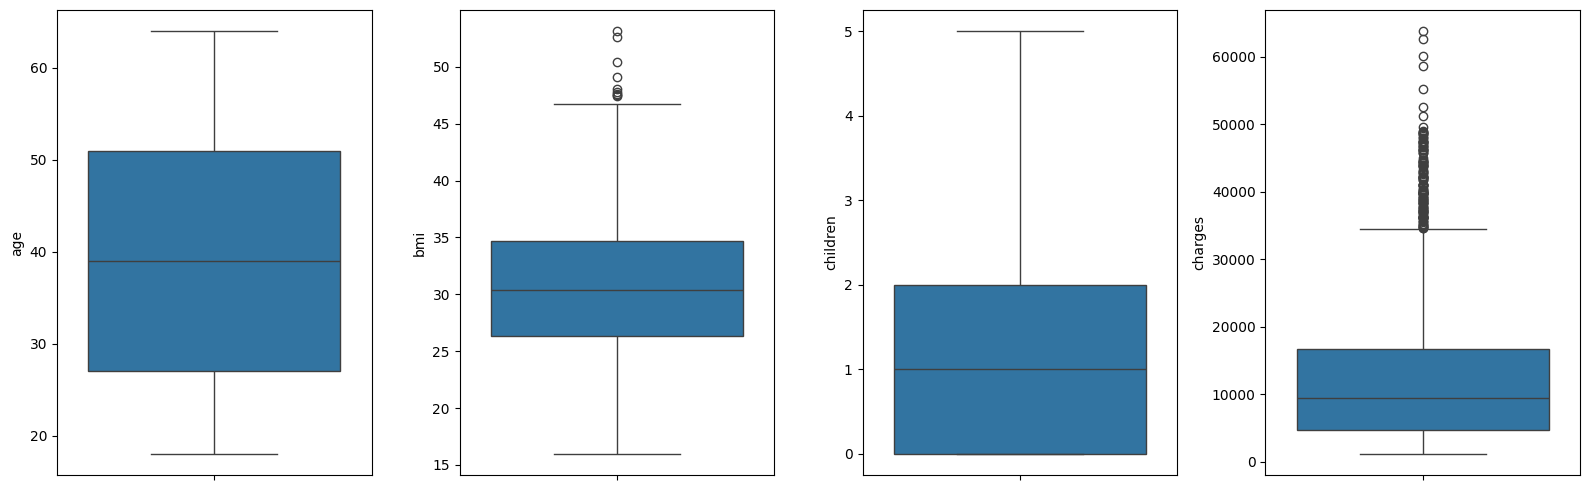

In [15]:
#grilla para graficos
fig, axis = plt.subplots(1, 4, figsize = (16, 5))

#grafico de caja de variables numericas para visualizar valores atipicos
sns.boxplot(ax = axis[0], data = df, y = "age")
sns.boxplot(ax = axis[1], data = df, y = "bmi")
sns.boxplot(ax = axis[2], data = df, y = "children")
sns.boxplot(ax = axis[3], data = df, y = "charges")

#ajustar y mostrar grafico
plt.tight_layout()
plt.show()

- Se asume que los datos atipicos siguen siendo legitimos, por lo tanto se conservan

**5.2 Analisis de Valores Faltantes**

- No aplica

**5.3 Inferencia de Nuevas Caracteristicas**

- No aplica

**Label Encoder**

In [16]:
# label_encoder = LabelEncoder()
# df['region_encoded'] = label_encoder.fit_transform((df['region']))
# df['sex_encoded'] = label_encoder.fit_transform((df['sex']))
# df['smoker_encoded'] = label_encoder.fit_transform((df['smoker']))
# df

**One-Hot Encoder**

In [17]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [18]:
#one hot encoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', feature_name_combiner='concat')

#obtener data transformada
transformed_data = onehot_encoder.fit_transform(df[['smoker']]).toarray()

#obtener nombres de variables
feature_names = onehot_encoder.get_feature_names_out(['smoker'])

# crear dataframe con data transformada y nombres de variables
ohe_df = pd.DataFrame(transformed_data, columns=feature_names)
df = df.join(ohe_df)
df

,age,sex,bmi,children,smoker,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0


**Paso 6: Seleccion de Caracteristicas**

In [19]:
X = df.drop(columns=['sex','region', 'charges', 'smoker', 'children'])
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.2, random_state=123)

**6.1 Escalamiento de Caracteristicas**

In [30]:
#escalamiento estandar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.70001322,  1.99987923,  0.5       , -0.5       ],
       [-0.5049873 ,  1.11166231,  0.5       , -0.5       ],
       [-0.85939922,  0.12540086, -2.        ,  2.        ],
       ...,
       [ 0.55824846, -0.67224951,  0.5       , -0.5       ],
       [-0.9302816 , -0.12054134,  0.5       , -0.5       ],
       [-1.3555759 , -0.5559255 , -2.        ,  2.        ]],
      shape=(268, 4))

**Paso 7: Elaborar Modelos**

**7.1 Regresion Lineal**

In [21]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
X

,age,bmi,smoker_no,smoker_yes
0,19,27.900,0.0,1.0
1,18,33.770,1.0,0.0
2,28,33.000,1.0,0.0
3,33,22.705,1.0,0.0
4,32,28.880,1.0,0.0
...,...,...,...,...
1333,50,30.970,1.0,0.0
1334,18,31.920,1.0,0.0
1335,18,36.850,1.0,0.0
1336,21,25.800,1.0,0.0


In [23]:
linear_regression_model.coef_

array([ 3649.72290079,  1974.8432699 , -4692.69436012,  4692.69436012])

In [24]:
y_pred = linear_regression_model.predict(X_test_scaled)
y_pred

array([ 1.50008657e+04,  8.84885844e+03,  2.90711132e+04,  5.29142596e+03,
        1.22873123e+04,  1.04944824e+04,  1.50710913e+03,  2.92640508e+03,
        5.09190808e+03,  8.86946562e+03,  8.02567039e+03,  1.38729763e+04,
        1.38762860e+04,  2.81446063e+04,  1.26292254e+04,  3.02918360e+04,
        1.60307193e+04,  1.61056781e+03,  3.34554039e+04,  3.48436072e+04,
        3.37741769e+04,  4.13101050e+04,  2.19961189e+03,  9.97057280e+03,
       -2.65193530e+01,  1.00103980e+04,  1.56625524e+04,  7.66957379e+03,
        1.34524134e+04, -6.36750921e+01,  8.98438241e+03,  1.62828569e+04,
        5.81989774e+03,  4.32181210e+03,  7.01712006e+03,  1.25618658e+04,
        1.85384678e+04,  7.48646461e+03,  1.09380734e+04,  1.04813555e+04,
        6.35804691e+03,  8.13007379e+03,  5.51692119e+03,  3.16679130e+04,
        5.88975897e+03,  2.61313892e+03,  1.29409905e+04,  1.33429755e+04,
        1.39539072e+04,  8.63551746e+03,  1.17907691e+04,  1.18902220e+04,
        2.80363089e+04,  

In [25]:
mean_squared_error(y_test, y_pred)

31173389.690659206

**7.2 Malla Elastica**

In [26]:
# X = df.drop(columns=['charges', 'sex', 'smoker', 'region'])
# y = df['charges']

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.2, random_state=123)

In [ ]:
# ajuste de hiperparametros para ElasticNet, con distintos valores de alpha y lr
alphas =  [0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]
lrs = [0, 0.5, 1]
errors_book = {}
promedio = []

for alpha in alphas:
  errors_book[alpha] = {}
  for lr in lrs:
    errors_book[alpha][lr] = []
    kfold = KFold(n_splits = 10)
    model = ElasticNet(alpha=alpha, l1_ratio = lr, random_state=123)
    for itrain, itest in kfold.split(X_train_scaled):
      model.fit(X_train_scaled[itrain], y_train.iloc[itrain])
      errors_book[alpha][lr].append(mean_squared_error(model.predict(X_train_scaled[itest]), y_train.iloc[itest]))
    promedio.append(np.mean(errors_book[alpha][lr]))

min_error = min(promedio)
min_error

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+10, tolerance: 1.425e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+10, tolerance: 1.381e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

np.float64(38819265.16471324)

In [29]:
# una vez detectado el error minimo obtenido, resta obtener a que combinacion de hiperparametro corresponde
# nuevo diccionario, esta vez de errores promedio
mean_errors_book = {}

#calculo de errores promedio para cada combinacion de parametros
for alpha in alphas:
  mean_errors_book[alpha] = {}
  for lr in lrs:
    mean_errors_book[alpha][lr] = {}
    mean_errors_book[alpha][lr] = np.mean(errors_book[alpha][lr])

#busqueda de valor minimo de error promedio dentro del nuevo diccionario
for alpha in alphas:
  for lr in lrs:
    if mean_errors_book[alpha][lr] == min_error:
      print(f'best alpha = {alpha}, best lr = {lr}')

best alpha = 0.0001, best lr = 0


- La Regresion Linear regular para estos datos da cuenta de un mejor modelo de prediccion en comparacion a Malla Elastica, ya que muestra un menor error cuadrado medio.